<a href="https://colab.research.google.com/github/adeiaa/kecerdasan-buatan/blob/main/kecerdasan_buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd

# Ambil review dari aplikasi Grammarly
hasil, _ = reviews(
    'com.grammarly.android.keyboard',  # ID aplikasi Grammarly
    lang='id',                         # Bahasa Indonesia
    country='id',                      # Negara Indonesia
    sort=Sort.NEWEST,                 # Review terbaru
    count=200                         # Jumlah review yang diambil
)

# Konversi ke DataFrame
df = pd.DataFrame(hasil)
df[['userName', 'score', 'content']].head()


,userName,score,content
0,alnen putra,5,good
1,kim Alusinsing,5,Thank you grammarly
2,Kusniawati Kusniawati,1,ribet daftar nya
3,Irwan Febrianto,5,mantap
4,Eko Permana,1,Kemampuan grammar check nya tidak sebagus dulu...


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positif'
    elif analysis.sentiment.polarity < 0:
        return 'Negatif'
    else:
        return 'Netral'

# Buat kolom sentimen
df['sentimen'] = df['content'].apply(get_sentiment)
df[['content', 'sentimen']].head()


,content,sentimen
0,good,Positif
1,Thank you grammarly,Netral
2,ribet daftar nya,Netral
3,mantap,Netral
4,Kemampuan grammar check nya tidak sebagus dulu...,Netral


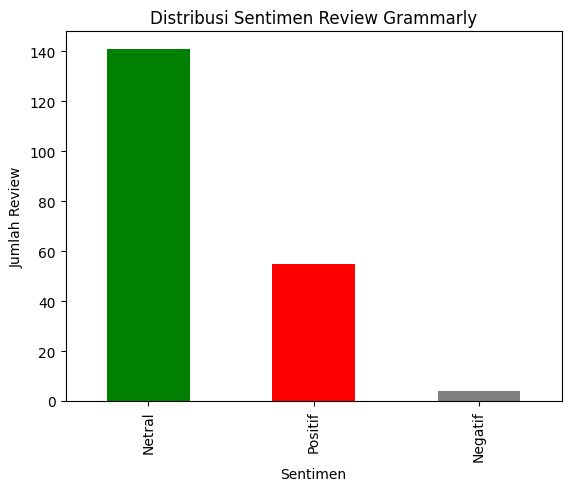

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentimen'].value_counts()
colors = ['green', 'red', 'grey']

sentiment_counts.plot(kind='bar', color=colors, title='Distribusi Sentimen Review Grammarly')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.show()


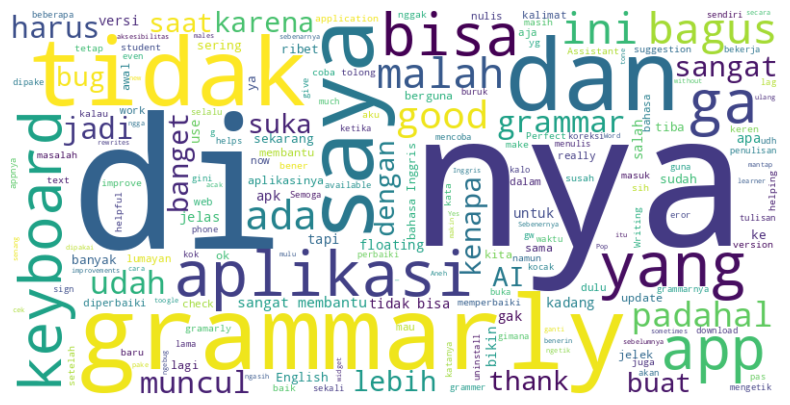

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
